In [ ]:
!unzip /content/drive/MyDrive/ML_data/archive.zip -d /content/drive/MyDrive/ML_data/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# preprocessing and data visualization

In [ ]:
!unzip /content/archive.zip

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import os
import numpy as np

# data loading things
folders = ["Blank", "Fist", "Five", "ThumbsUp", "Two", "Yo"]
folders_2=["call_me","fingers_crossed","okay","paper","peace","rock","rock_on","scissor","thumbs","up"]

common_path = r'/content/'
common_path_2 = r'/content/HandGesture/images/'


def im_load(path):
    d = imread(path)
    return d


def load_data():
    X = []
    Y = []
    for i in range(0, len(folders_2)):
        curr_path = common_path_2 + folders_2[i]
        list_img = sorted(os.listdir(curr_path))
        print(len(list_img))
        for img_name in list_img:
            X.append(im_load(curr_path + r"/" + img_name))
            Y.append(i)

    X = np.asarray(X, dtype='float32')
    Y = np.asarray(Y, dtype='float32')
    return X, Y


# data loading things ends


# plotings---------

def plot_img(img, cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.show()


def plot_img_path(path, cmap='gray'):
    plt.imshow(im_load(path), cmap=cmap)
    plt.show()

# ploting ends

In [ ]:
X, Y = load_data()

527
504
540
539
526
508
531
527
537
504


In [ ]:
print(X.shape)
print(Y.shape)

(5243, 195, 240)
(5243,)


In [ ]:
def give_array(y):
  count=[]
  for  i in range(0,len(folders_2)):
    temp=0
    for j in y:
      if(j==i):
        temp=temp+1;
    count.append(temp)
  return count


In [ ]:
counts=give_array(Y)
print(counts)

[527, 504, 540, 539, 526, 508, 531, 527, 537, 504]


In [ ]:
# bargraph

import numpy as np
import matplotlib.pyplot as plt




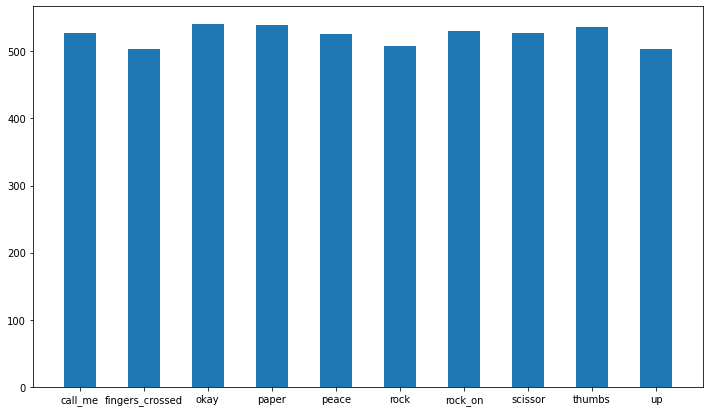

In [ ]:
fig = plt.figure(figsize =(12, 7))
plt.bar( folders_2,counts,width = 0.5)
plt.show()

call_me
fingers_crossed
okay
paper
peace
rock
rock_on
scissor
thumbs
up


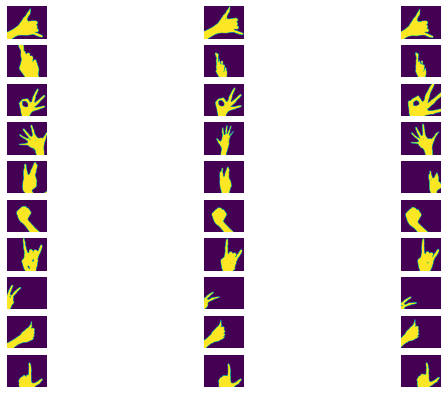

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows= 10
col=3
p=1
for i in range(0, len(folders_2)):
  print(folders_2[i])
  curr_path = common_path_2 + folders_2[i]
  list_img = sorted(os.listdir(curr_path))
  #print(len(list_img))
  for img_name in list_img[0:3]:
    fig.add_subplot(rows, col, p)
    plt.imshow(im_load(curr_path + r"/" + img_name))
    plt.axis('off')
    ##plt.title(folders_2[i])
    p=p+1

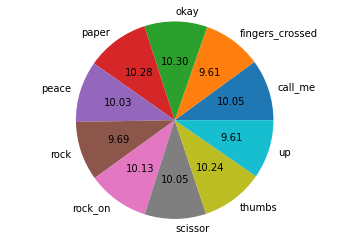

In [ ]:
percentage=[]
total=0
for i in counts:
  total=total+i
for i in counts:
  percentage.append(float(i)*100/float(total))

#print(percentage)
plt.pie(percentage,labels=folders_2,autopct='%.2f')
plt.axis("equal")
plt.show()

In [ ]:
# flatterning the data
X_2=[]
for i in X:
  temp=i.reshape(195*240,)
  X_2.append(temp)


In [ ]:
# resaving in x (can change also)
X = np.asarray(X_2, dtype='float32')

In [ ]:
print(X.shape)
print(Y.shape)

(5243, 46800)
(5243,)


# testing out different algorithms without applying PCA

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
def metric(y_pred,y):
    acc=accuracy_score(y, y_pred)
    print("accuracy:-" ,acc*100,"%")
    cm=confusion_matrix(y,y_pred)
    print("confusion matrix:- ")
    print(cm)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("class wise accuracy:- ",cm.diagonal()*100)


In [ ]:
print(X.shape)
print(Y.shape)

(5243, 46800)
(5243,)


In [ ]:
from sklearn.model_selection import train_test_split
# splitting data into 70:30
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=56)


In [ ]:
x_train=x_train.reshape(3512, 46800)
x_test=x_test.reshape(1731, 46800)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3512, 46800)
(3512,)
(1731, 46800)
(1731,)


In [ ]:
# decission tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =20000, random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20000, random_state=42)

In [ ]:
test_pred_decision_tree = clf.predict(x_test)
metric(test_pred_decision_tree,y_test)

accuracy:- 62.333911034084345 %
confusion matrix:- 
[[132   0   8   1   1   3   2   3  20   2]
 [  0  99   3   3  27   6  11  11   3   7]
 [  9  10  75  23   8  20   9   3   3  10]
 [  4   9  25  55  22  15  10  14   2  17]
 [  1  16   3  12 103   6  10  10   0   4]
 [  3   5  10   5   8 109   3   6   7   5]
 [  4  12   6   4  14   9 119   1   1   3]
 [  9  14   5  16  17   2   2 101   7   6]
 [ 17   7   3   1   0   1   0   6 170   0]
 [  0  16   1  11   8   7   1   2   1 116]]
class wise accuracy:-  [76.74418605 58.23529412 44.11764706 31.79190751 62.42424242 67.70186335
 68.78612717 56.42458101 82.92682927 71.16564417]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [ ]:
y_pred=[]
import numpy as np
for i in pred:
  index = np.argmax(i)
  y_pred.append(index)
metric(y_pred,y_test)

accuracy:- 9.936452917388792 %
confusion matrix:- 
[[172   0   0   0   0   0   0   0   0   0]
 [170   0   0   0   0   0   0   0   0   0]
 [170   0   0   0   0   0   0   0   0   0]
 [173   0   0   0   0   0   0   0   0   0]
 [165   0   0   0   0   0   0   0   0   0]
 [161   0   0   0   0   0   0   0   0   0]
 [173   0   0   0   0   0   0   0   0   0]
 [179   0   0   0   0   0   0   0   0   0]
 [205   0   0   0   0   0   0   0   0   0]
 [163   0   0   0   0   0   0   0   0   0]]
class wise accuracy:-  [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


In [ ]:
# gaussian classifire
from sklearn.naive_bayes import GaussianNB
def nave(x_train, x_test, y_train, y_test):
  model = GaussianNB()
  model.fit(x_train,y_train)
  expected=y_test
  predicted=model.predict(x_test)
  print(f"for the test data performance is:")
  metric(expected,predicted)
nave(x_train, x_test, y_train, y_test)

for the test data performance is:
accuracy:- 32.466782206816866 %
confusion matrix:- 
[[ 16   5   8   3   2   2   3   3   6   0]
 [  4  11   7   4   2   6   6   2   4   5]
 [  9   0  28   7   2   7   2   3   2   3]
 [  3   0   2   3   0   3   0   0   0   0]
 [  0  14   7  12  47  21  32   6   0   4]
 [  7   4  46  32   3  37   6   5   3   3]
 [  0   7   7   5   0   2  70   5   0   3]
 [ 70  44  26  58  58  38   3 150  92  30]
 [ 60  14   6   3   2  11  12   2  87   2]
 [  3  71  33  46  49  34  39   3  11 113]]
class wise accuracy:-  [33.33333333 21.56862745 44.44444444 27.27272727 32.86713287 25.34246575
 70.70707071 26.36203866 43.71859296 28.10945274]


In [ ]:
# bagging classifire
from sklearn.ensemble import BaggingClassifier
def bagging(x_train, x_test, y_train, y_test):
  model = BaggingClassifier()
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  metric(y_pred,y_test)

bagging(x_train, x_test, y_train, y_test)

accuracy:- 74.63893703061814 %
confusion matrix:- 
[[150   0   5   0   0   2   0   2  12   1]
 [  0 144   0   0   9   3   1   9   2   2]
 [  6   5 119  21   7   7   2   3   0   0]
 [  2  22  32  73  12   7   2  11   1  11]
 [  0  31   2  12 106   3   3   6   0   2]
 [  3   8   2   3   2 130   4   4   5   0]
 [  1   9   2   4   7   4 143   0   1   2]
 [ 10  21   4   8   6   4   0 120   5   1]
 [ 18   1   3   1   0   1   1   1 177   2]
 [  2  18   2   5   2   2   0   2   0 130]]
class wise accuracy:-  [87.20930233 84.70588235 70.         42.19653179 64.24242424 80.74534161
 82.65895954 67.03910615 86.34146341 79.75460123]


In [ ]:
# using  SVM with two types of kernel
from sklearn.svm import SVC
def svm(x_train, x_test, y_train, y_test,kernel='linear'):
  svclassifier = SVC(kernel=kernel)
  svclassifier.fit(x_train, y_train)
  y_pred=svclassifier.predict(x_test)
  metric(y_pred,y_test)

svm(x_train, x_test, y_train, y_test,kernel='linear')
svm(x_train, x_test, y_train, y_test,kernel='rbf')

In [ ]:
# using AdaBoost classifire
from sklearn.ensemble import AdaBoostClassifier
def ada(x_train, x_test, y_train, y_test):
  clf = AdaBoostClassifier(n_estimators=100, random_state=0)
  clf.fit(x_train, y_train)
  y_pred=clf.predict(x_test)
  metric(y_pred,y_test)
ada(x_train, x_test, y_train, y_test)

accuracy:- 21.201617562102832 %
confusion matrix:- 
[[  5   0   4   1  15   0   0   2 145   0]
 [  0   0   0   1 155   0   0   1  13   0]
 [  1   0   4   0 141   0   0   2  22   0]
 [  1   0   0   0 169   0   0   1   2   0]
 [  0   0   0   0 164   0   0   0   1   0]
 [  2   1   0   0 139   0   0   4  15   0]
 [  1   0   0   0 171   0   0   0   1   0]
 [  1   0   5   1 130   0   0   4  38   0]
 [  1   0   6   0   5   0   0   3 190   0]
 [  0   0   0   1 159   0   0   1   2   0]]
class wise accuracy:-  [ 2.90697674  0.          2.35294118  0.         99.39393939  0.
  0.          2.23463687 92.68292683  0.        ]


# now using PCA and running all algorithms again

In [ ]:
X,Y=load_data()
# flatterning the data
X_2=[]
for i in X:
  temp=i.reshape(195*240,)
  X_2.append(temp)
X = np.asarray(X_2, dtype='float32')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
n=200 # using top 20 feature vectors
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(X)
X = principalComponents
print(X.shape)
print(Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=56)


527
504
540
539
526
508
531
527
537
504
(5243, 200)
(5243,)


In [ ]:
# decission tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =20000, random_state = 42)
clf.fit(x_train, y_train)
test_pred_decision_tree = clf.predict(x_test)
metric(test_pred_decision_tree,y_test)

accuracy:- 58.578856152513005 %
confusion matrix:- 
[[133   1   2   3   1   3   1   3  24   1]
 [  0 100   0   8  19   6  11  12   1  13]
 [  6   4  90  21   9  15   9   4   1  11]
 [  4  18  22  67  19   7   9   8   2  17]
 [  0  18   8  15  75   8  14  15   3   9]
 [  4   3  10   6  13 101   8   2   9   5]
 [  1   9   6   8  19   7 109   4   1   9]
 [ 13  15   0  15   7   9   6  88  17   9]
 [ 18   4   4   3   2   5   2  12 152   3]
 [  2  11  11   8   9   1  12   6   4  99]]
class wise accuracy:-  [77.3255814  58.82352941 52.94117647 38.7283237  45.45454545 62.73291925
 63.00578035 49.16201117 74.14634146 60.73619632]


In [ ]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
y_pred=[]
import numpy as np
for i in pred:
  index = np.argmax(i)
  y_pred.append(index)
metric(y_pred,y_test)


accuracy:- 9.936452917388792 %
confusion matrix:- 
[[172   0   0   0   0   0   0   0   0   0]
 [170   0   0   0   0   0   0   0   0   0]
 [170   0   0   0   0   0   0   0   0   0]
 [173   0   0   0   0   0   0   0   0   0]
 [165   0   0   0   0   0   0   0   0   0]
 [161   0   0   0   0   0   0   0   0   0]
 [173   0   0   0   0   0   0   0   0   0]
 [179   0   0   0   0   0   0   0   0   0]
 [205   0   0   0   0   0   0   0   0   0]
 [163   0   0   0   0   0   0   0   0   0]]
class wise accuracy:-  [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


In [ ]:
# gaussian classifire
from sklearn.naive_bayes import GaussianNB
def nave(x_train, x_test, y_train, y_test):
  model = GaussianNB()
  model.fit(x_train,y_train)
  expected=y_test
  predicted=model.predict(x_test)
  print(f"for the test data performance is:")
  metric(expected,predicted)
nave(x_train, x_test, y_train, y_test)

for the test data performance is:
accuracy:- 72.67475447718083 %
confusion matrix:- 
[[135   3   1   2   0   8   1  11  13   3]
 [  0 136   0   2  35  22   8  11  14   4]
 [ 10   0 136  20   1   6   5   9   1   0]
 [  0   1  30 118   4   0   7   8   0   5]
 [  0   8   0   4 111   6   7  21   3   3]
 [  0   5   0   0   0 115   1   6  11   5]
 [  0   4   0   1  13   0 125   7   0  15]
 [ 15   4   3  23   1   1   0 101   4   6]
 [ 12   3   0   0   0   3   0   1 159   0]
 [  0   6   0   3   0   0  19   4   0 122]]
class wise accuracy:-  [76.27118644 58.62068966 72.34042553 68.20809249 68.09815951 80.41958042
 75.75757576 63.92405063 89.3258427  79.22077922]


In [ ]:
# bagging classifire
from sklearn.ensemble import BaggingClassifier
def bagging(x_train, x_test, y_train, y_test):
  model = BaggingClassifier()
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  metric(y_pred,y_test)

bagging(x_train, x_test, y_train, y_test)

accuracy:- 70.99942229924899 %
confusion matrix:- 
[[152   0   3   0   1   1   0   5  10   0]
 [  0 149   3   0   7   1   2   5   0   3]
 [ 11   6 115  12   3  10   3   1   0   9]
 [  4  20  23  78  17   6   6  14   0   5]
 [  1  17   4  10 101   1   9  14   0   8]
 [  4   9   6   8   4 116   3   3   5   3]
 [  1  10   5   6  14   5 122   0   2   8]
 [  8  26   7  13   7   2   2 102   7   5]
 [ 14   0   1   0   2   4   0   6 174   4]
 [  1  17   2   9   4   0   8   1   1 120]]
class wise accuracy:-  [88.37209302 87.64705882 67.64705882 45.0867052  61.21212121 72.04968944
 70.52023121 56.98324022 84.87804878 73.6196319 ]


In [ ]:
# using  SVM with two types of kernel
from sklearn.svm import SVC
def svm(x_train, x_test, y_train, y_test,kernel='linear'):
  svclassifier = SVC(kernel=kernel)
  svclassifier.fit(x_train, y_train)
  y_pred=svclassifier.predict(x_test)
  metric(y_pred,y_test)

svm(x_train, x_test, y_train, y_test,kernel='linear')
svm(x_train, x_test, y_train, y_test,kernel='rbf')

In [ ]:
# using AdaBoost classifire
from sklearn.ensemble import AdaBoostClassifier
def ada(x_train, x_test, y_train, y_test):
  clf = AdaBoostClassifier(n_estimators=100, random_state=0)
  clf.fit(x_train, y_train)
  y_pred=clf.predict(x_test)
  metric(y_pred,y_test)
ada(x_train, x_test, y_train, y_test)

accuracy:- 35.93298671288272 %
confusion matrix:- 
[[96  0  4  3  2 33  0  4 29  1]
 [ 2 51  5  4 28  9 20 32  7 12]
 [16  1 56 26  9 34 11  4  1 12]
 [ 2  7 28 46 17 17 18 12  0 26]
 [ 2 10  3 16 38 10 41 24  1 20]
 [12 11  6  6 12 85  9  6  3 11]
 [ 0  2  9 20 31  8 65  3  0 35]
 [18 14  5 11 12 12  6 71 18 12]
 [71 15  0  2  7 18  2  9 77  4]
 [ 0 18 14 28 16  8 29 12  1 37]]
class wise accuracy:-  [55.81395349 30.         32.94117647 26.58959538 23.03030303 52.79503106
 37.57225434 39.66480447 37.56097561 22.6993865 ]


#  now using CNN network for image classification

In [ ]:
import cv2
X,Y=load_data()
X_2=[]
st=64
for i in X:
  temp=cv2.resize(i, (st, st)) 
  temp=temp.reshape(st,st,1)
  X_2.append(temp)
X = np.asarray(X_2, dtype='float32')
#print(X.shape)
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.33, random_state=56)


527
504
540
539
526
508
531
527
537
504


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3512, 64, 64, 1)
(3512,)
(1731, 64, 64, 1)
(1731,)


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(st, st, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 18432)             0

In [ ]:
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40
110/110 [==============================] - 11s 19ms/step - loss: 2.4242 - accuracy: 0.5760 - val_loss: 0.5329 - val_accuracy: 0.8261
Epoch 2/40
110/110 [==============================] - 2s 15ms/step - loss: 0.2601 - accuracy: 0.9200 - val_loss: 0.3207 - val_accuracy: 0.8949
Epoch 3/40
110/110 [==============================] - 2s 15ms/step - loss: 0.1031 - accuracy: 0.9655 - val_loss: 0.2685 - val_accuracy: 0.9318
Epoch 4/40
110/110 [==============================] - 2s 15ms/step - loss: 0.0518 - accuracy: 0.9826 - val_loss: 0.2527 - val_accuracy: 0.9365
Epoch 5/40
110/110 [==============================] - 2s 15ms/step - loss: 0.0228 - accuracy: 0.9937 - val_loss: 0.2745 - val_accuracy: 0.9330
Epoch 6/40
110/110 [==============================] - 2s 15ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.3553 - val_accuracy: 0.9226
Epoch 7/40
110/110 [==============================] - 2s 15ms/step - loss: 0.0636 - accuracy: 0.9786 - val_loss: 0.3283 - val_accuracy: 0.933

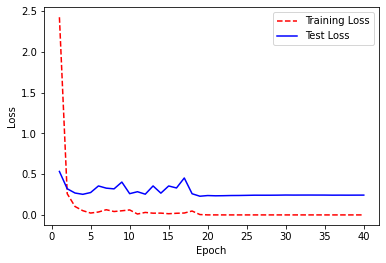

In [ ]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

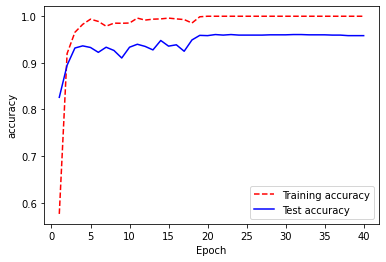

In [ ]:
training_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();

In [ ]:
pred=model(x_test)
y_pred=[]
import numpy as np
for i in pred:
  index = np.argmax(i)
  y_pred.append(index)
print(pred.shape)
metric(y_pred,y_test)

(1731, 10)
accuracy:- 95.84055459272098 %
confusion matrix:- 
[[167   0   1   0   0   0   0   2   2   0]
 [  0 159   0   0   5   1   1   1   3   0]
 [  0   0 163   4   0   0   0   2   0   1]
 [  0   0   2 169   0   0   0   0   0   2]
 [  0   3   0   0 154   0   1   6   0   1]
 [  0   1   0   0   1 157   0   1   1   0]
 [  0   0   0   0   1   0 172   0   0   0]
 [  0   0   1   3   8   0   5 161   0   1]
 [  3   0   0   0   0   0   0   0 202   0]
 [  1   1   0   1   0   0   1   2   2 155]]
class wise accuracy:-  [97.09302326 93.52941176 95.88235294 97.68786127 93.33333333 97.51552795
 99.42196532 89.94413408 98.53658537 95.09202454]
